In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
dt=pd.read_csv('Add_sales_data_2018.csv')

In [83]:
dt.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [84]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.5+ KB


# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.


In [85]:
co=dt.corr()
co

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


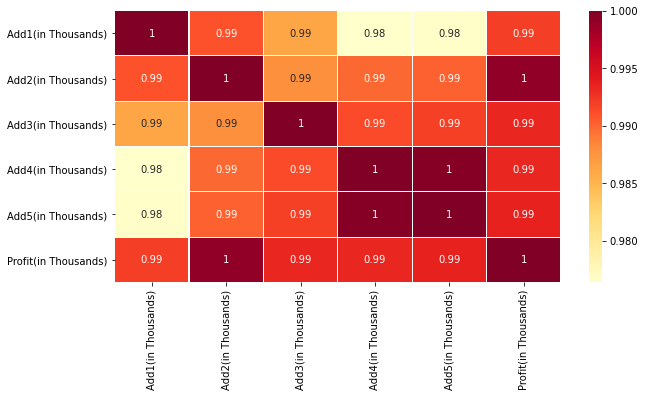

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(data=co,cmap='YlOrRd',annot=True,linewidth=0.1)
plt.show()

Insight :

We can observe a positive correlation between the amount spent for advertising through five different companies and profit generated .

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [87]:

y=dt['Profit(in Thousands)']                       #storing dependent variable
x=dt.drop(['Profit(in Thousands)','Date'],axis=1)  #storing independent variable

In [88]:
#splitting dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)


In [89]:
#LINEAR REGRESSION

from sklearn import linear_model
lr=linear_model.LinearRegression()
md1=lr.fit(x_train,y_train)


In [90]:
pd1=md1.predict(x_test)
pd1


array([4494.144, 5921.116, 4404.686, 4190.965, 5880.541, 5728.804,
       5225.14 , 5017.503, 5518.561, 4513.6  , 4464.11 , 5140.372,
       4760.877, 5038.222, 4606.34 , 5730.999, 4922.845, 4470.775,
       4480.363, 5065.652, 5043.705, 5491.792, 4968.03 , 5792.175,
       6137.8  , 5247.011, 5137.534, 5373.275, 5212.949, 4898.776,
       5972.337, 5745.806, 5153.977, 5805.521, 4763.69 , 4175.677,
       5938.474, 4915.682, 4523.704, 5113.337, 4648.627, 4350.683,
       4916.064, 4934.682, 5108.626, 5167.878, 4451.999, 4980.446,
       5177.61 , 5861.83 , 4425.005, 4887.296, 5267.657, 5088.455,
       5163.693, 5430.79 , 5250.775, 5435.316, 5134.657, 4435.174,
       4598.292, 4979.399])

In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pd1,y_test)
print('Mean Squared Error =',mean_squared_error(y_pred,y_test))

Mean Squared Error = 3.388772186910791e-24


In [92]:
from sklearn.metrics import r2_score
lr_r2=r2_score(pd1,y_test)
print('R2 value = ',lr_r2)

R2 value =  1.0


MSE received is 3.388772186910791e-24 and Rsquare value =1

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
## Add1(in Thousands) 290
## Add2(in Thousands) 312
## Add3(in Thousands) 309
## Add4(in Thousands) 298
## Add5(in Thousands) 320

In [94]:
md1.predict(np.array([[290,312,309,298,320]]))

array([5820.06])

Profit generated = 5820 (in Thousands)